<a href="https://colab.research.google.com/github/Cralsic123/A01-Video-Sentiment-Analysis/blob/main/Video_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge


Dataset URL: https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge
License(s): copyright-authors
 84% 81.0M/96.6M [00:01<00:00, 71.2MB/s]
100% 96.6M/96.6M [00:01<00:00, 80.2MB/s]


I am going to make a model that will try to derive the expression of sentiment from the video live motion or picture of the user


In [3]:
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge


Dataset URL: https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge
License(s): copyright-authors
facial-expression-recognitionferchallenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!mkdir data
!unzip facial-expression-recognitionferchallenge.zip -d data

Archive:  facial-expression-recognitionferchallenge.zip
  inflating: data/Submission.csv     
  inflating: data/fer2013/fer2013/README  
  inflating: data/fer2013/fer2013/fer2013.bib  
  inflating: data/fer2013/fer2013/fer2013.csv  


In [5]:
import numpy as np
import pandas as pd
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [6]:
data_frame = pd.read_csv('data/fer2013/fer2013/fer2013.csv')
print(data_frame.shape)
data_frame=data_frame[data_frame['emotion']!=5 ]
data_frame=data_frame[data_frame['emotion']!=6 ]
data_frame.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training


In [7]:
data_frame.emotion.unique()

array([0, 2, 4, 3, 1])

In [8]:

label_to_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad'}

In [9]:
data_frame.emotion.value_counts()

emotion
3    8989
4    6077
2    5121
0    4953
1     547
Name: count, dtype: int64

In [10]:
math.sqrt(len(data_frame.pixels[0].split(' ')))

48.0

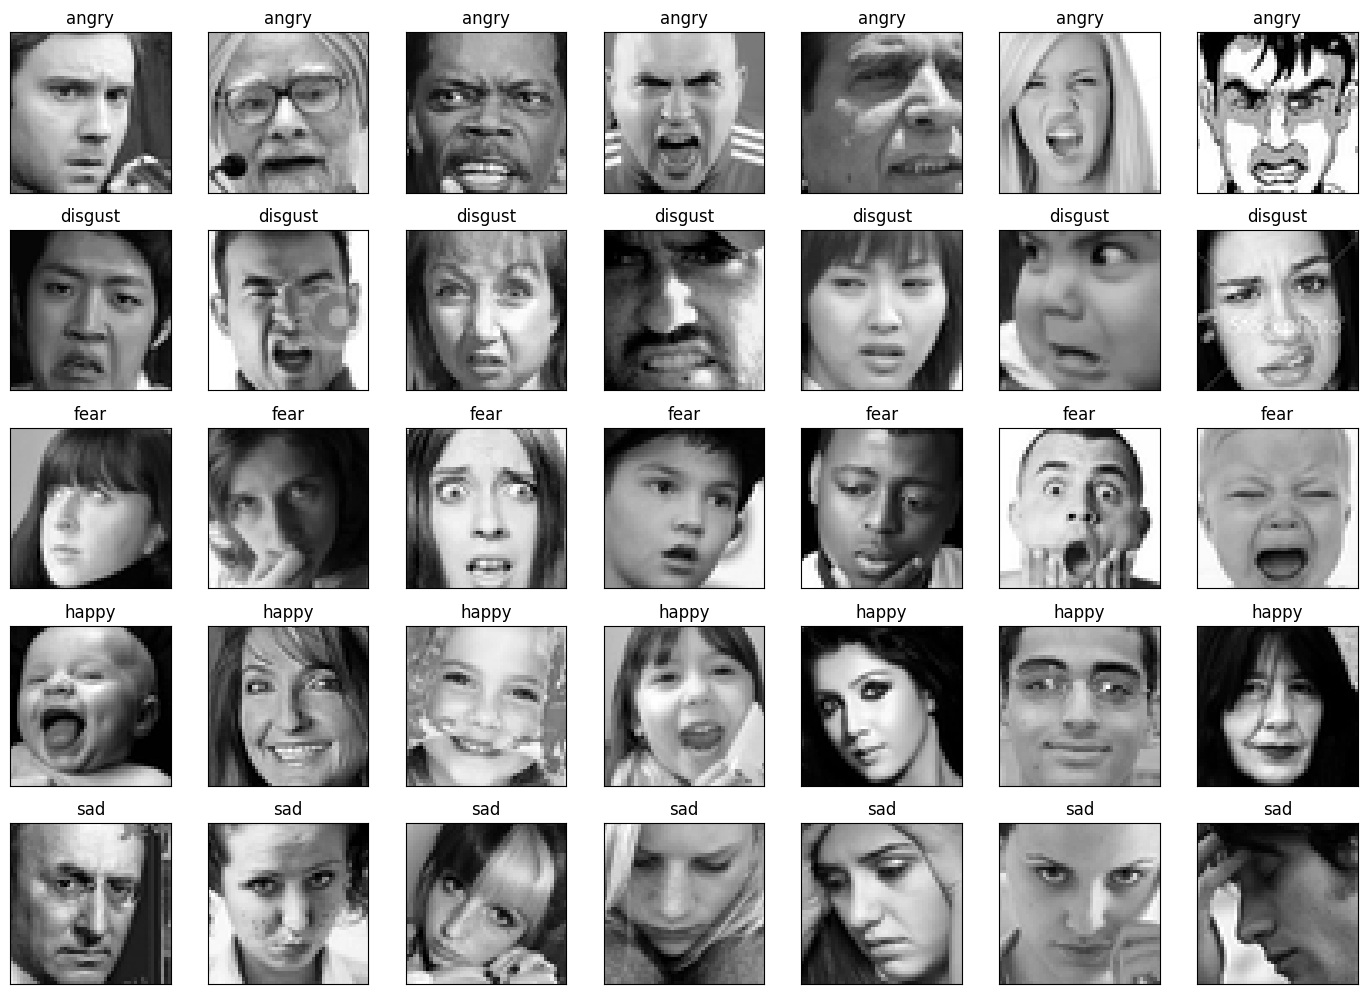

In [11]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(data_frame.emotion.unique()):
    for j in range(7):
        px = data_frame[data_frame.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [12]:
img_array = data_frame.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [12]:
img_array.shape

In [14]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=c3e20a1dfa1a31fdd20c8c87f45237fc87555055e8592a11363720fe0be2c885
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [15]:
from keras.utils import np_utils


ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/utils/__init__.py)